## Toxic: LDA

Toxic words should be classified into one of six groups: Toxic, Severe Toxic, Obscene, Threat, Insult and Identity Hate. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from gensim import corpora, models, similarities, matutils
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

from wordcloud import WordCloud

import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle('../data/toxictrain.pkl')
print(df.shape)
# df.head()

(159571, 24)


In [3]:
df_t = df[df['rating']>0]
df_nt = df[df['rating']==0]
print(df_t.shape, df_nt.shape)

(16225, 24) (143346, 24)


### Assumptions

In [4]:
categories = ['clean','toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [5]:
def create_wordcloud(text,width,height,max_words,title):
    wordcloud = WordCloud(width=width,height=height,max_words=max_words).generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title,fontweight='bold',fontsize=16)

def topics_wordcloud(data, num_topics,ngram_range, max_words, label):
    fig = plt.figure(figsize=(30,15))
    topics_dict = {}
    count_vectorizer = CountVectorizer(ngram_range=ngram_range,  stop_words='english', max_df=0.02, token_pattern="\\b[a-z][a-z]+\\b")
    count_vectorizer.fit(data)
    counts = count_vectorizer.transform(data).transpose()
    corpus = matutils.Sparse2Corpus(counts)
    id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())
    lda = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, passes=10) # minimum_probability=0.03, 
    lda_corpus = lda[corpus]
    lda_docs = [doc for doc in lda_corpus]
    topics = lda.print_topics(num_words=200)
    i = 0
    for topic in topics:
        topics_dict[topic[0]] = lda_docs # , lda.log_perplexity
        nrows = math.ceil(num_topics / 3)
        ax = fig.add_subplot(nrows,3,i+1)
        topics_dict[topic[0]] = topic
        title = " Topic: " + str(topic[0])
        filepath = '../charts/' + label + str(topic[0]) + '.png'
        create_wordcloud(topic[1],400,200,max_words,title)
        i+=1
    plt.savefig(filepath)
    print("Chart saved at {}".format(filepath))
    return topics_dict

Chart saved at ../charts/6t12n5.png


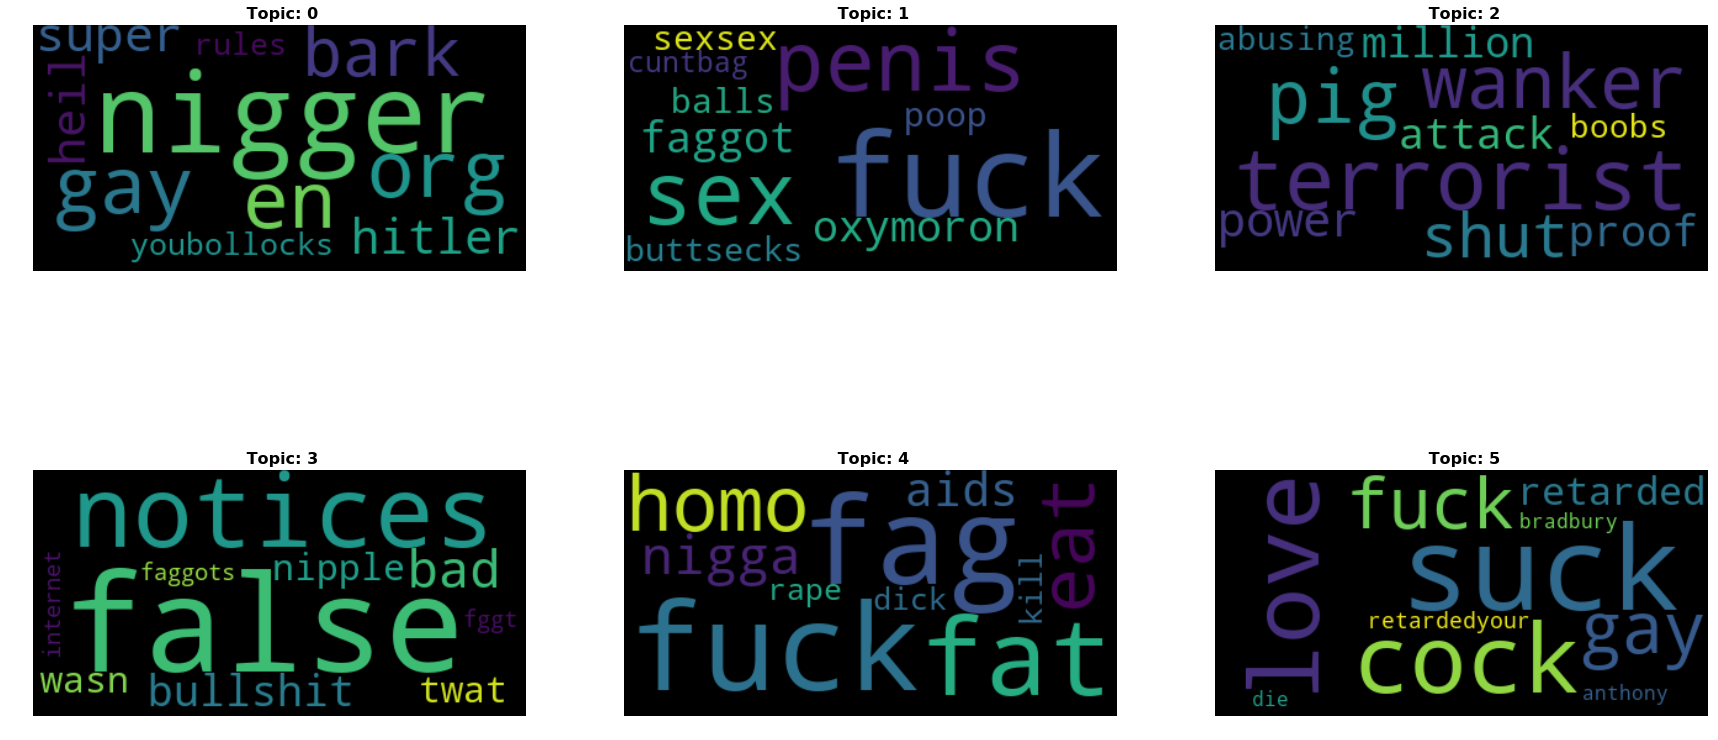

In [6]:
td1 = topics_wordcloud(df_t.comment_text, 6,(1,2),10,'6t12n')
# td1

In [7]:
td1

{0: (0,
  '0.009*"nigger" + 0.008*"bark" + 0.008*"bark bark" + 0.006*"nigger nigger" + 0.005*"shit shit" + 0.005*"super" + 0.005*"super gay" + 0.005*"gay super" + 0.004*"hitler" + 0.003*"heil" + 0.003*"heil hitler" + 0.003*"hitler heil" + 0.003*"youbollocks" + 0.003*"youbollocks youbollocks" + 0.003*"rules" + 0.002*"loser" + 0.002*"vandalism rules" + 0.002*"rules vandalism" + 0.002*"dickhead" + 0.002*"org" + 0.002*"nigger delanoy" + 0.002*"delanoy nigger" + 0.002*"bollocks" + 0.002*"loser loser" + 0.002*"http" + 0.002*"bollocks bollocks" + 0.001*"dickhead dickhead" + 0.001*"en" + 0.001*"bastard" + 0.001*"wikipedia org" + 0.001*"criminalwar" + 0.001*"criminalwar criminalwar" + 0.001*"en wikipedia" + 0.001*"org wiki" + 0.001*"utc" + 0.001*"pro" + 0.001*"biznitch" + 0.001*"repeat biznitch" + 0.001*"biznitch repeat" + 0.001*"prestigious" + 0.001*"assad" + 0.001*"chinese" + 0.001*"blah" + 0.001*"arse" + 0.001*"bitches" + 0.001*"lmao" + 0.001*"bastard pro" + 0.001*"pro assad" + 0.001*"mexica

In [8]:
td2 = topics_wordcloud(df_t.comment_text, 6,(2,3),'6t23n')

TypeError: topics_wordcloud() missing 1 required positional argument: 'label'

In [ ]:
td3 = topics_wordcloud(df_t.comment_text, 6,(3,4),'6t34n')

In [ ]:
for category in categories:
    print(category)
    data = df[df[category]==1]
    topics_wordcloud(data.comment_text, 1,(1,3),category)

In [ ]:
for category in categories:
    print(category)
    data = df[df[category]==1]
    topics_wordcloud(data.comment_text, 3,(1,3),category)

In [ ]:
for category in categories:
    print(category)
    data = df[df[category]==1]
    topics_wordcloud(data.comment_text, 5,(1,3),category)

In [ ]:
# https://www.kaggle.com/jagangupta/stop-the-s-toxic-comments-eda
# categories = ['clean','toxic','severe_toxic','obscene','threat','insult','identity_hate']

# for category in categories:
#     if category == 'clean':
#         doc = df
#     else:
#         doc = df[df[category]==1]
        
# #     pipe = Pipeline([('vect',CountVectorizer(ngram_range=(2, 4),  stop_words='english', max_df=0.02, token_pattern="\\b[a-z][a-z]+\\b")),
# #                 ('tfidf',TfidfTransformer())])
#     count_vectorizer = CountVectorizer(ngram_range=(2, 4),  stop_words='english', max_df=0.02, token_pattern="\\b[a-z][a-z]+\\b")

#     count_vectorizer.fit(doc.comment_text_s)
#     counts = count_vectorizer.transform(doc.comment_text_s).transpose()
#     corpus = matutils.Sparse2Corpus(counts)
#     id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())
    
#     lda = models.LdaModel(corpus=corpus, num_topics=1, id2word=id2word, passes=10) # minimum_probability=0.03, 
#     topics = lda.print_topics(num_words=2000)

#     print("Category: " + category)
#     for topic in topics:
#         wordcloud = WordCloud(max_words=2000).generate(topic[1])
#         plt.figure(figsize=(20,10))
#         plt.imshow(wordcloud,interpolation='bilinear')
#         plt.title(category,fontweight='bold',fontsize=16)
#         plt.axis("off")
#         plt.savefig('../charts/wordcloud_trigram' + category + '_1.png')
#         plt.show()